In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

import uproot

import histlite as hl

import scipy.interpolate as interp

from scipy.optimize import curve_fit


plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

In [3]:
replayed_data_dir = '/global/cfs/cdirs/lux/users/haselsco/TUNL_August_2021_Data/replayed/slurm_run30201/'

rootfiles = [filename for filename in os.listdir(replayed_data_dir) \
                                         if filename.endswith('.root')]

In [4]:
data_list = []

print('{} files found.'.format(len(rootfiles)))

for i,thisfile in enumerate(rootfiles):
    if i % 10 == 0:
        print('Opening {} of {}'.format(i,len(rootfiles)))
    
    fullpath = replayed_data_dir + thisfile
    
    data_list.append( uproot.open(fullpath)['gamma_events'].arrays( ["*"], outputtype=pd.DataFrame ) )
    


157 files found.
Opening 0 of 157
Opening 10 of 157
Opening 20 of 157
Opening 30 of 157
Opening 40 of 157
Opening 50 of 157
Opening 60 of 157
Opening 70 of 157
Opening 80 of 157
Opening 90 of 157
Opening 100 of 157
Opening 110 of 157
Opening 120 of 157
Opening 130 of 157
Opening 140 of 157


KeyError: not found: b'gamma_events'
 in file: /global/cfs/cdirs/lux/users/haselsco/TUNL_August_2021_Data/replayed/slurm_run30201/run30201_156.root

In [6]:
data = pd.concat(data_list,ignore_index=True)

data.head()

,gamma_ch,gamma_PH,gamma_E,gamma_ts,gamma_tof,gamma_PSD,gamma_flash,gamma_true_time,gamma_t10,gamma_t25,gamma_t50,gamma_t90
0,27.0,132.850000,0.0,9.091738e+11,1836.737819,8.0,0.0,1836.737819,72.0,81.0,99.0,150.0
1,30.0,284.641667,0.0,9.091738e+11,1857.935329,8.0,0.0,1857.935329,91.0,105.0,126.0,294.0
2,27.0,136.991667,0.0,9.091738e+11,5035.308742,8.0,0.0,5035.308742,75.0,84.0,109.0,191.0
3,30.0,1133.200000,0.0,9.091738e+11,5155.018703,8.0,0.0,5155.018703,90.0,105.0,127.0,272.0
4,27.0,135.475000,0.0,9.091738e+11,8296.232081,8.0,0.0,8296.232081,74.0,84.0,109.0,224.0


In [19]:
mask_pmt = data['gamma_ch'] == 27

data_pmt = data.loc[mask_pmt]

data_pmt.head()


,gamma_ch,gamma_PH,gamma_E,gamma_ts,gamma_tof,gamma_PSD,gamma_flash,gamma_true_time,gamma_t10,gamma_t25,gamma_t50,gamma_t90
0,27.0,132.850000,0.0,9.091738e+11,1836.737819,8.0,0.0,1836.737819,72.0,81.0,99.0,150.0
2,27.0,136.991667,0.0,9.091738e+11,5035.308742,8.0,0.0,5035.308742,75.0,84.0,109.0,191.0
4,27.0,135.475000,0.0,9.091738e+11,8296.232081,8.0,0.0,8296.232081,74.0,84.0,109.0,224.0
7,27.0,6.016667,0.0,9.091742e+11,11833.228170,8.0,0.0,11833.228170,36.0,103.0,115.0,469.0
8,27.0,98.033333,0.0,9.091742e+11,1784.950422,8.0,0.0,1784.950422,73.0,83.0,104.0,188.0


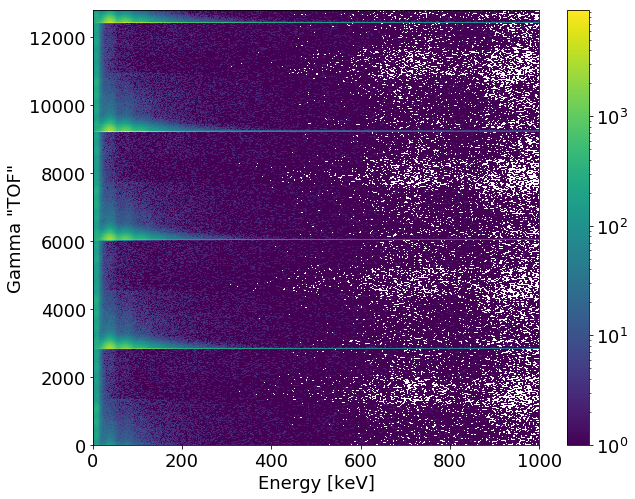

In [20]:
from matplotlib import colors

plt.hist2d( data_pmt['gamma_PH'] * 0.6219,\
                 data_pmt['gamma_tof'], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,12800,3200)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('Gamma \"TOF\"')
plt.xlim(0.,1000.)
plt.colorbar()

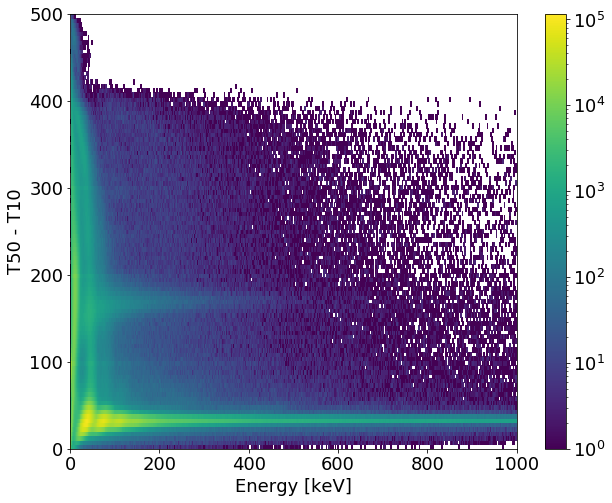

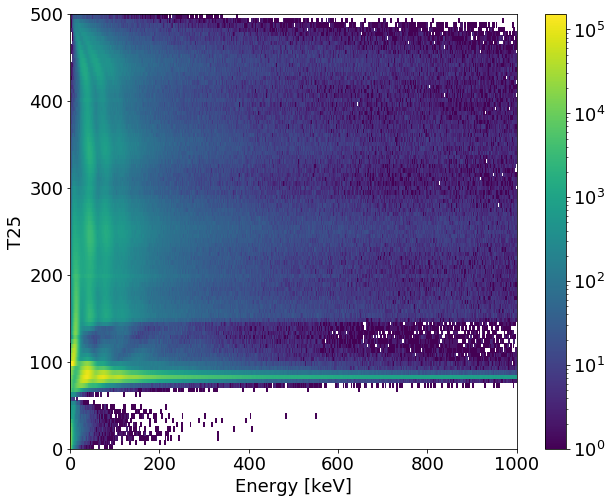

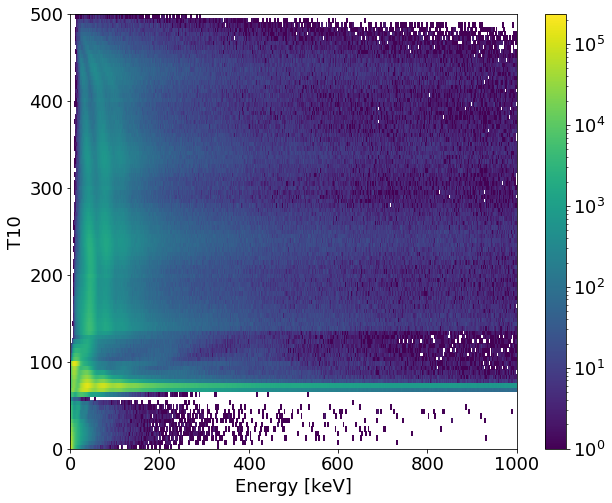

In [76]:
mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_t50'].loc[mask] - data_pmt['gamma_t10'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T50 - T10')
plt.xlim(0.,1000.)
#plt.ylim(0.,200.)
plt.colorbar()

plt.figure(2)
#mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_t25'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T25')
plt.xlim(0.,1000.)
plt.colorbar()

plt.figure(3)
#mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_t10'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T10')
plt.xlim(0.,1000.)
plt.colorbar()


(0.0, 3200.0)

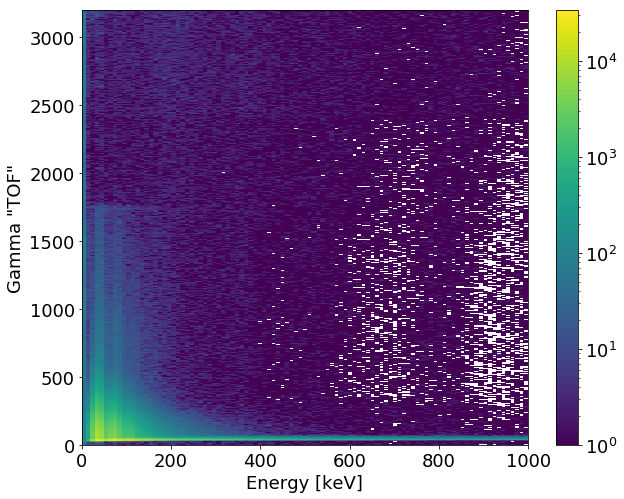

In [49]:
mask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 np.fmod(data_pmt['gamma_tof'].loc[mask]+400,3200.), \
               bins=[np.linspace(0.,1000.,100),np.linspace(0.,3200,3200)],\
                            norm=colors.LogNorm() )

TOFdata = np.fmod(data_pmt['gamma_tof']+400,3200.)

plt.xlabel('Energy [keV]')
plt.ylabel('Gamma \"TOF\"')
plt.xlim(0.,1000.)
plt.colorbar()
           
plt.ylim(0.,3200.)

(0.0, 200.0)

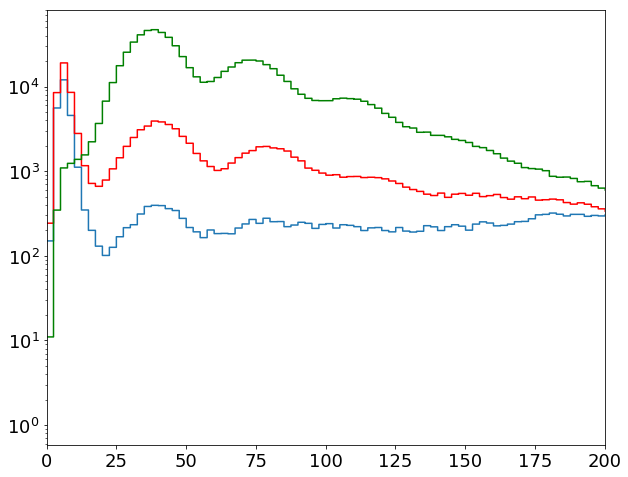

In [69]:
thismask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)&\
        (TOFdata>1800.)&(TOFdata<2400.)
    
h_delayed_energy = hl.hist(data_pmt['gamma_PH'].loc[thismask]*0.6219, bins=np.linspace(0.,2000.,800))

hl.plot1d(h_delayed_energy)

plt.yscale('log')





thismask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)&\
        (TOFdata>1000.)&(TOFdata<1500.)
    
h_delayed_energy2 = hl.hist(data_pmt['gamma_PH'].loc[thismask]*0.6219, bins=np.linspace(0.,2000.,800))

hl.plot1d(h_delayed_energy2,color='r')

plt.yscale('log')





thismask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)&\
        (TOFdata>80.)&(TOFdata<100.)
    
h_prompt_energy = hl.hist(data_pmt['gamma_PH'].loc[thismask]*0.6219, bins=np.linspace(0.,2000.,800))

hl.plot1d(h_prompt_energy,color='g')

plt.yscale('log')

plt.xlim(0.,200.)




In [60]:
import pickle

datalist = []

for i in range(30):
    filename = replayed_data_dir + 'run30201_{}_nai_pmt_waveforms.pkl'.format(i)
    with open( filename ,'rb') as pklfile:
        datalist.extend(pickle.load(pklfile))
    
datadf = pd.DataFrame(datalist)


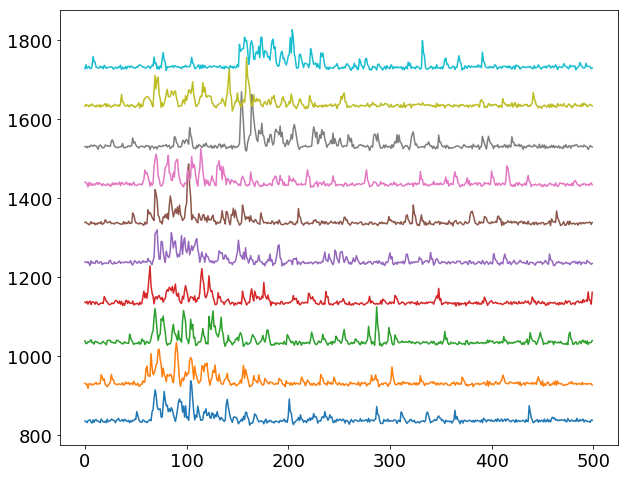

In [66]:
mask = (datadf['t50'] - datadf['t10']>15)&\
        (datadf['t50'] - datadf['t10']<55)&\
        (datadf['peakhigh_reported']* 0.6219 < 50)&\
        (datadf['peakhigh_reported']* 0.6219 > 30)
        

dfmask = datadf.loc[mask]

for i in range(10):
    try:
        plt.plot(dfmask['samples'].iloc[i] + 100*i)
    except IndexError:
        break

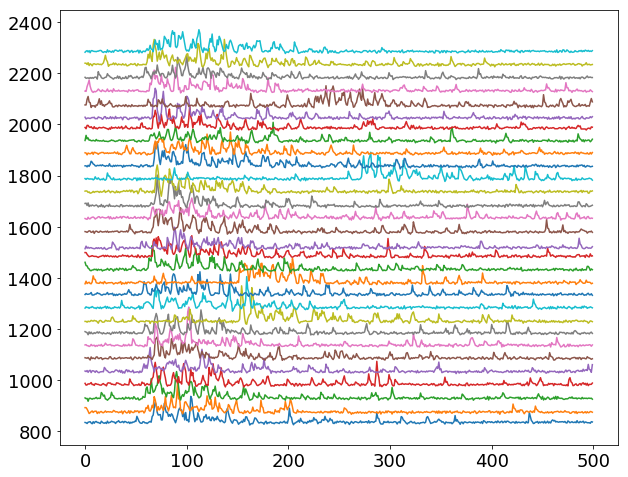

In [79]:
mask = (datadf['t50'] - datadf['t10']>15)&\
        (datadf['t50'] - datadf['t10']<55)&\
         (datadf['peakhigh_reported']* 0.6219 > 20)&\
         (datadf['peakhigh_reported']* 0.6219 < 50)
        

dfmask = datadf.loc[mask]

for i in range(30):
    try:
        plt.plot(dfmask['samples'].iloc[i] + 50*i)
    except IndexError:
        break

In [ ]:
mask = (datadf['t25']>75.)&(datadf['t25']<100.)&\
        (datadf['t50'] - datadf['t10']>75)&\
        (datadf['t50'] - datadf['t10']<125)&\
        (datadf['peakhigh_reported']* 0.6219 < 50)&\
        (datadf['peakhigh_reported']* 0.6219 > 30)
        

dfmask = datadf.loc[mask]

for i in range(10):
    try:
        plt.plot(dfmask['samples'].iloc[i] + 100*i)
    except IndexError:
        break